# Pythonでの回帰と分類事例

# 重回帰例 (大気中のオゾン量) Air Quality Data

In [1]:
# Pythonプログラム
import csv
import codecs
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

url = "http://www.tutarc.org/Seminar/Python/data/airquality.csv"
airquality = pd.read_csv(url)
airquality = airquality.dropna() # remove NAデータ

print (type(airquality))
print (airquality.shape)
print ("-------------------------")
# データの最初の行を見る
print (airquality.head(1))
airquality.head(10)

<class 'pandas.core.frame.DataFrame'>
(111, 6)
-------------------------
   Ozone  SolarR  Wind  Temp  Month  Day
0   41.0   190.0   7.4    67      5    1


,Ozone,SolarR,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
11,16.0,256.0,9.7,69,5,12
12,11.0,290.0,9.2,66,5,13
13,14.0,274.0,10.9,68,5,14


In [2]:
import statsmodels.formula.api as sm
# オゾンを日射量＋風＋気温の重回帰であてはめてみる
model = sm.ols(formula='Ozone ~ SolarR+Wind+Temp', data=airquality)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     54.83
Date:                Thu, 03 May 2018   Prob (F-statistic):           1.51e-21
Time:                        15:46:38   Log-Likelihood:                -494.36
No. Observations:                 111   AIC:                             996.7
Df Residuals:                     107   BIC:                             1008.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -64.3421     23.055     -2.791      0.006    -110.045     -18.639
SolarR         0.0598      0.023      2.580      0.011       0.014       0.106
Wind          -3.3336      0.654     -5.094      0.000      -4.631      -2.036
Temp           1.6521      0.254      6.516      0.000       1.149       2.155
==============================================================================
Omnibus:                       38.348   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.801
Skew:                           1.362   Prob(JB):                     3.85e-19
Kurtosis:                       6.303   Cond. No.                     2.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
print (fitted.rsquared) # 寄与率
print (fitted.rsquared_adj)#　自由度調整済み寄与率
print (fitted.aic) # AIC

0.6058946000066223
0.5948449158946585
996.7171028738219


In [4]:
# オゾンを風邪と気温だけで重回帰してみる
import statsmodels.formula.api as sm
model1 = sm.ols(formula='Ozone ~ Wind+Temp', data=airquality)
fitted1 = model1.fit()
print(fitted1.summary())
print('---------------------')
print (fitted1.rsquared)
print (fitted1.rsquared_adj)
print (fitted1.aic)

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     74.99
Date:                Thu, 03 May 2018   Prob (F-statistic):           3.79e-21
Time:                        15:48:08   Log-Likelihood:                -497.71
No. Observations:                 111   AIC:                             1001.
Df Residuals:                     108   BIC:                             1010.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.3220     23.621     -2.850      0.0

In [5]:
# オゾンを日射量と気温だけで重回帰してみる
import statsmodels.formula.api as sm
model2 = sm.ols(formula='Ozone ~ SolarR+Temp', data=airquality)
fitted2 = model2.fit()
print(fitted2.summary())
print('---------------------')
print (fitted2.rsquared)
print (fitted2.rsquared_adj)
print (fitted2.aic)

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     56.28
Date:                Thu, 03 May 2018   Prob (F-statistic):           1.80e-17
Time:                        15:48:13   Log-Likelihood:                -506.41
No. Observations:                 111   AIC:                             1019.
Df Residuals:                     108   BIC:                             1027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -145.7032     18.447     -7.899      0.0

In [6]:
# オゾンを日射量と風だけで重回帰してみる
import statsmodels.formula.api as sm
model3 = sm.ols(formula='Ozone ~ SolarR+Wind', data=airquality)
fitted3 = model3.fit()
print(fitted3.summary())
print('---------------------')
print (fitted3.rsquared)
print (fitted3.rsquared_adj)
print (fitted3.aic)

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     44.09
Date:                Thu, 03 May 2018   Prob (F-statistic):           1.00e-14
Time:                        15:48:17   Log-Likelihood:                -512.91
No. Observations:                 111   AIC:                             1032.
Df Residuals:                     108   BIC:                             1040.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.2460      9.068      8.519      0.0

上記３つの実験で気温がない場合に、もっとも重回帰の性能が下がる。
すなわち、気温の影響がオゾンに一番影響していることが判明

In [7]:
import matplotlib
import matplotlib.pyplot as plt # 描画ライブラリ
print (matplotlib.rcParams.get('font.family'))
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

font_prop = fm.FontProperties()  
font_prop.set_style('normal')
font_prop.set_weight('light')
font_prop.set_size('12')

fp2 = font_prop.copy()# フォントプロパティ(FP)をコピー
fp2.set_size('20')# フォントプロパティ(FP)をコピー
fp2.set_family('serif')# フォントはSerif(明朝体など）に設定

['sans-serif']


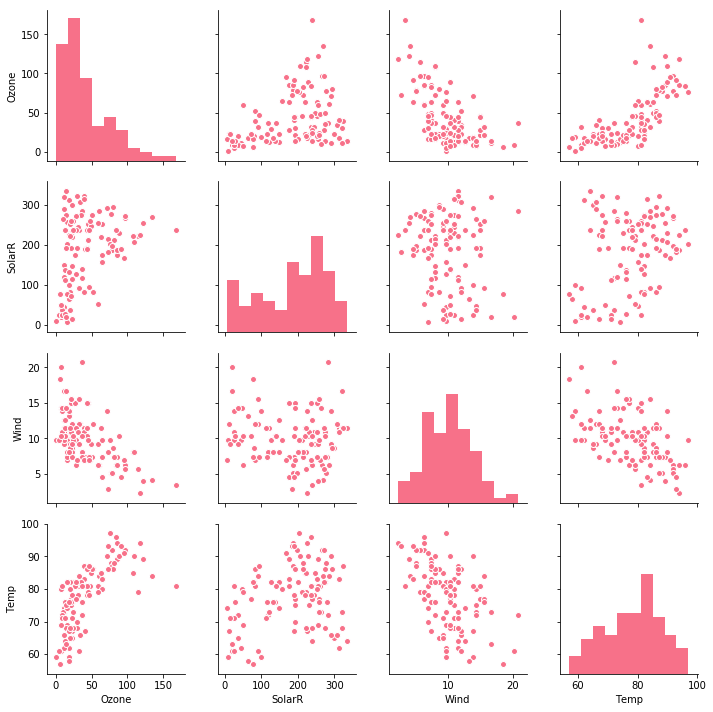

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("husl")
sns.pairplot(airquality[["Ozone","SolarR","Wind","Temp"]])
plt.show()

# Classification  Spam メールの判定例

In [9]:
import csv
import numpy as np
import pandas as pd

url = 'http://www.tutarc.org/Seminar/Python/data/spam.csv'
cr = pd.read_csv(url)
data_all = cr.as_matrix()
numData = data_all.shape[0]
colNum = data_all.shape[1]-1 # ラベルを除外した属性数
mycolumns = list(cr.columns.values)

# 0からnumData(4601)までのpermutationインデックスを生成
a = np.append(np.arange(0,numData-1), numData-1)

#import random as rand
np.random.seed(41)
permutation = np.random.choice(a, size=numData, replace=False, p=None)

train_num = 3000
test_num = numData - train_num

b = permutation[:train_num]

# 訓練データ生成
train = np.zeros((train_num,colNum),dtype=float)
trainLabel = np.zeros(train_num, dtype=int)
for i in range(train_num):
    line = data_all[b[i]]
    for j in range(colNum):
        train[i,j] = float(line[j])
    if line[colNum]=='spam':
        trainLabel[i] = 1 # spam
    else:
        trainLabel[i] = 0 #non-spam

# テストデータ生成
test = np.zeros((test_num,colNum),dtype=float)
testLabel = np.zeros(test_num, dtype=int)
b_test = permutation[train_num:numData]
for i in range(test_num):
    line = data_all[b_test[i]]
    for j in range(colNum):
        test[i,j] = float(line[j])

    if line[colNum]=='spam':
        testLabel[i] = 1 # spam
    else:
        testLabel[i] = 0 #non-spa

In [10]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

# SVM (rbf)
C = 4.0  # SVM regularization parameter
svcR = svm.SVC(kernel='rbf', C=C, gamma=0.01).fit(train, trainLabel)
#テストデータの予測をする
svmR_predict = svcR.predict(test)
svmR_cmat = confusion_matrix(testLabel, svmR_predict)
print ("SVM(RBF)\n",svmR_cmat)
a = np.sum(np.diag(svmR_cmat))
sum_a = np.sum(svmR_cmat)
acc = a / float(sum_a)
print ("SVM（RBFカーネル）での分類精度 = %5.3f" % acc)
print ()

# SVM (liblinear)
C = 1.0  # SVM regularization parameter
svcLL = svm.LinearSVC(C=C).fit(train, trainLabel)
#テストデータの予測をする
svmLL_predict = svcLL.predict(test)
svmLL_cmat = confusion_matrix(testLabel, svmLL_predict)
print ("SVM(Liblinear)\n",svmLL_cmat)
a = np.sum(np.diag(svmLL_cmat))
sum_a = np.sum(svmLL_cmat)
acc = a / float(sum_a)
print ("SVM（LibLinear）での分類精度 = %5.3f" % acc)


SVM(RBF)
 [[832 126]
 [114 529]]
SVM（RBFカーネル）での分類精度 = 0.850

SVM(Liblinear)
 [[943  15]
 [517 126]]
SVM（LibLinear）での分類精度 = 0.668


# ランダム・フォレスト法による分類


In [11]:
from sklearn.ensemble import RandomForestClassifier

#r_forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
r_forest = RandomForestClassifier(random_state=0, n_jobs=-1)

r_fit = r_forest.fit(train, trainLabel)
importances = r_forest.feature_importances_
indices = np.argsort(importances)[::-1]
imp_label = []
for f in range(train.shape[1]):
    imp_label.append(mycolumns[indices[f]])
    print(("%2d) %-*s %f" % (f + 1, 30, 
                            mycolumns[indices[f]], 
                            importances[indices[f]])))

 1) charExclamation                0.089909
 2) capitalAve                     0.084663
 3) money                          0.072203
 4) free                           0.070149
 5) your                           0.063020
 6) num000                         0.058559
 7) remove                         0.056128
 8) charDollar                     0.055053
 9) capitalLong                    0.047808
10) capitalTotal                   0.039107
11) our                            0.038531
12) hp                             0.038311
13) george                         0.027280
14) you                            0.024872
15) business                       0.023349
16) hpl                            0.022672
17) internet                       0.019964
18) edu                            0.013180
19) charRoundbracket               0.010861
20) will                           0.010087
21) re                             0.009383
22) over                           0.008336
23) num1999                     

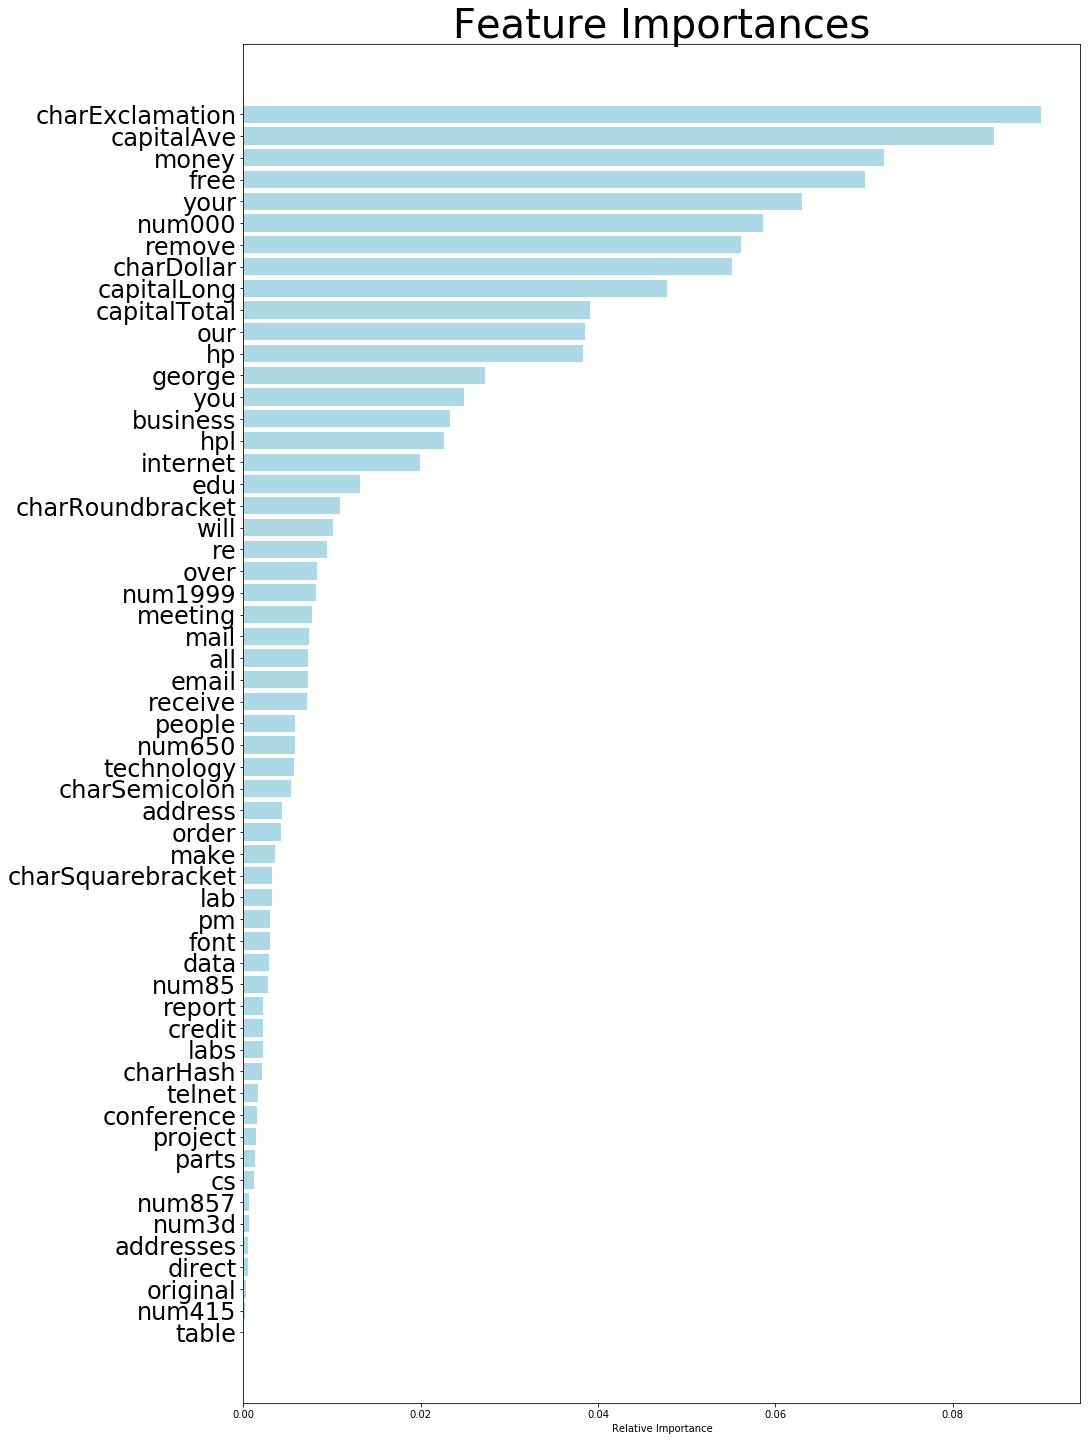

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

import matplotlib as mpl
label_size = 24
mpl.rcParams['ytick.labelsize'] = label_size 

r_forest = RandomForestClassifier(random_state=0, n_jobs=-1)

scaler = preprocessing.StandardScaler()
train = scaler.fit_transform(train)

r_fit = r_forest.fit(train, trainLabel)
importances = r_forest.feature_importances_

indices = sorted_idx = np.argsort(importances) # [::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(15, 25))
plt.barh(pos, importances[sorted_idx], align='center', color='lightblue')
plt.yticks(pos, np.asanyarray(mycolumns)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importances', fontsize=40)
plt.show()


# 映画の興行収入の予測事例


In [13]:
import csv
import codecs
import numpy as np
import pandas as pd

url_head = "http://www.tutarc.org/Seminar/Python/data/"
url_train = url_head +"trainMovieR.csv" # 訓練データ
url_test = url_head + "testMovieR.csv" # テストデータ
url_title = url_head + "testMovieTitle.txt" # タイトルデータ

cr_train = pd.read_csv(url_train)
cr_test = pd.read_csv(url_test)

train_data = cr_train.as_matrix() # 行列に変換

print (type(train_data),train_data.shape) # データのサイズ等の確認
#print ('{:.3f}'.format(train_data[0]) )# 第一データの確認
num_train_data = numData = train_data.shape[0] # データ総数
colNum = train_data.shape[1]-1 # ラベルを除外した属性数
mycolumns = list(cr_train.columns.values) # コラムの名前を保持
print (mycolumns) # コラムの名前を確認

import urllib
f = urllib.request.urlopen(url_title)
myfile = f.read()
title = myfile.splitlines()
print(type(title[0]))
for i in range(10):
    s = title[i].decode('utf-8')
    print (s)


<class 'numpy.ndarray'> (3111, 20)
['監督の値', '出演者の値', '上映時間', 'mpaa_G', 'mpaa_PG', 'mpaa_PG-13', 'mpaa_R', 'mpaa_UR', 'mpaa_NC-17', '続編', '初公開映画館数', '出演者数', '配給会社のマーケットシェア', 'ロケ地数', '制作・配給に関わる会社数', 'サウンドトラック数', '特殊効果に関わる会社数', 'リメイク', '小説ベース', 'boxoffice']
<class 'bytes'>
Toy Story 3
Alice in Wonderland (2010)
Harry Potter and the Deathly Hallows Part 1
Inception
Shrek Forever After
The Twilight Saga: Eclipse
Iron Man 2
Tangled
Spring Fever
Chance Pe Dance


In [14]:
test_data = cr_test.as_matrix() # 行列に変換
print (type(test_data),test_data.shape) # データのサイズ等の確認
#print (test_data[0]) # 第一データの確認
num_test_data = numDataT = test_data.shape[0] # データ総数
colNumT = test_data.shape[1]-1 # ラベルを除外した属性数
mycolumnsT = list(cr_test.columns.values) # コラムの名前を保持
print (mycolumnsT) # コラムの名前を確認

<class 'numpy.ndarray'> (315, 20)
['監督の値', '出演者の値', '上映時間', 'mpaa_G', 'mpaa_PG', 'mpaa_PG-13', 'mpaa_R', 'mpaa_UR', 'mpaa_NC-17', '続編', '初公開映画館数', '出演者数', '配給会社のマーケットシェア', 'ロケ地数', '制作・配給に関わる会社数', 'サウンドトラック数', '特殊効果に関わる会社数', 'リメイク', '小説ベース', 'boxoffice']


In [15]:
train = np.zeros((num_train_data,colNum), dtype=float) #ndarray for scikit-learn SVM
trainValue = np.zeros(num_train_data,dtype=float) # ndarray for scikit-learn SVM
for i in range(num_train_data):
    line = train_data[i]
    for j in range(colNum):
        train[i,j] = float(line[j])
    trainValue[i] = float(line[colNum]) # box office value
    #print "(train) box office = ",trainValue[i]

print ("---------------")
#print printFloat(train[0])
print (train[0])
print ("---------------")
print (trainValue[:10])

test = np.zeros((num_test_data,colNum), dtype=float) #ndarray for scikit-learn SVM
testValue = np.zeros(num_test_data,dtype=float) # ndarray for scikit-learn SVM
for i in range(num_test_data):
    line = test_data[i]
    for j in range(colNum):
        test[i,j] = float(line[j])
    testValue[i] = float(line[colNum]) # box office value
    #print "(test) box office = ",testValue[i]
    
print ("-------------")
#print printFloat(test[0])
print (type(test[0]))
print (np.round(test[0],3))
print ("---------------")
print (testValue[:10])

---------------
[1.17244093e+01 0.00000000e+00 1.52000000e+02 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.67200000e+03 6.60000000e+01
 1.26180000e-01 2.50000000e+01 5.80000000e+01 0.00000000e+00
 1.30000000e+01 0.00000000e+00 1.00000000e+00]
---------------
[20.69774288 20.58319885 20.08612085 19.99842157 19.92631249 19.92297878
 19.88624829 19.72576505 19.7077071  19.6782891 ]
-------------
<class 'numpy.ndarray'>
[1.0383e+01 1.1667e+01 1.0300e+02 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 4.0280e+03 6.0000e+01
 1.2800e-01 0.0000e+00 2.7000e+01 5.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00]
---------------
[20.78454907 20.74727529 20.67868679 20.53149982 20.43904444 20.36444574
 20.25150066 20.19681883 11.98915964 12.17044547]


In [16]:
from sklearn import svm
from scipy import linalg as la
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

svr = svm.SVR(kernel='rbf',C=60,gamma=0.001)
#svc = svm.SVC(kernel='linear',C=1.0)
svr.fit(train, trainValue)
predictValue = svr.predict(test)

MSE_SVR = mean_squared_error(testValue, predictValue)
print ("MSE = ",MSE_SVR) # 平均２乗誤差

r2 = r2_score(predictValue, testValue)
print ("R2 = ",r2)

print ("予測例")
list = [0, 5, 9]
for i in list:
    print ("**************")
    print (title[i].decode('utf-8'))
    print ("予測された興行収入",round(predictValue[i],3))
    print ("実際の興行収入",round(testValue[i],3))
    

MSE =  2.980723378049288
R2 =  0.47163092684182495
予測例
**************
Toy Story 3
予測された興行収入 19.084
実際の興行収入 20.785
**************
The Twilight Saga: Eclipse
予測された興行収入 17.525
実際の興行収入 20.364
**************
Chance Pe Dance
予測された興行収入 13.834
実際の興行収入 12.17
